## comparing  pca with clustering 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
uni = pd.read_csv("zoo.csv")

In [3]:
uni.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
uni.shape

(101, 18)

In [5]:
uni.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn as sk

In [7]:
sk.preprocessing.scale

<function sklearn.preprocessing.data.scale(X, axis=0, with_mean=True, with_std=True, copy=True)>

In [8]:
uni.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
uni.data= uni.iloc[:,1:]

C:\Users\srabb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [10]:
uni.data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
import sklearn as sk
from sklearn.preprocessing import scale

In [12]:
uni_normal=scale(uni.data)
type(uni_normal)

C:\Users\srabb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [13]:
uni_normal1=pd.DataFrame(uni_normal)
uni_normal1.head()
type(uni_normal1)

pandas.core.frame.DataFrame

In [14]:
pcs=PCA()
pca_value= PCA().fit_transform(uni_normal1)
pca_value= pcs.fit_transform(uni_normal1)


In [15]:
type(pca_value)

numpy.ndarray

In [45]:
var=pcs.explained_variance_ratio_
var

array([0.31140457, 0.19656175, 0.15808491, 0.07274227, 0.0562927 ,
       0.04390317, 0.0331517 , 0.03057921, 0.0264896 , 0.02240955,
       0.01664268, 0.01241563, 0.00765549, 0.00735888, 0.00266875,
       0.00104656, 0.00059259])

In [17]:

pccomp = pd.DataFrame(pcs.components_)
pccomp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.365057,0.124412,0.395027,-0.411567,0.146461,0.191004,0.031681,-0.295103,-0.251291,-0.216616,0.111658,0.069861,-0.066201,-0.171368,-0.094217,-0.275602,0.365784
1,-0.119176,-0.185534,-0.000023,-0.003314,-0.306744,0.375346,0.252368,0.316769,0.206864,-0.366452,0.001704,0.455776,-0.344366,0.163622,-0.117960,0.090427,-0.009399
2,0.186787,-0.504222,-0.139621,0.114749,-0.311355,0.006890,0.087255,0.108444,-0.390807,-0.132630,0.176961,-0.049992,0.309452,-0.408083,-0.042356,0.006230,0.305920
3,0.058717,-0.161842,0.007388,-0.021119,0.046640,-0.079891,-0.587435,0.171909,0.009407,-0.153220,0.061197,0.216989,-0.179227,-0.020915,0.629475,-0.283337,0.056540
4,0.008278,0.024145,-0.084897,-0.062424,0.072533,-0.050845,0.223832,0.090026,0.113792,0.099678,0.907997,-0.125547,-0.069178,0.169192,0.088526,-0.124610,-0.048082
5,-0.061479,0.192631,0.055663,-0.017117,-0.099125,0.197082,0.345496,-0.201285,-0.021073,-0.103477,-0.016175,-0.042382,0.163227,-0.094659,0.703159,0.451214,-0.018225
6,0.061743,0.029352,0.031117,-0.017232,0.082114,-0.001292,-0.470437,-0.194275,-0.146108,-0.030938,0.298360,0.239880,-0.116436,-0.015432,-0.229693,0.701121,0.035659
7,0.326745,0.013446,-0.123568,0.191187,0.652884,0.485694,0.108182,0.007531,-0.032930,0.015559,0.018180,0.269080,0.096359,-0.241608,-0.020666,-0.116640,-0.107551
8,-0.027172,0.057976,-0.013041,0.076077,-0.031010,-0.221410,0.185277,0.005123,-0.011234,0.259811,-0.013542,0.016467,-0.658881,-0.629964,0.036835,0.032672,-0.064184
9,-0.163105,0.049876,0.125445,-0.062862,-0.275848,0.548407,-0.333761,0.165438,0.341644,0.374869,0.080633,-0.227853,0.160698,-0.299664,-0.045550,-0.000662,-0.047419


In [18]:
var

array([0.31140457, 0.19656175, 0.15808491, 0.07274227, 0.0562927 ,
       0.04390317, 0.0331517 , 0.03057921, 0.0264896 , 0.02240955,
       0.01664268, 0.01241563, 0.00765549, 0.00735888, 0.00266875,
       0.00104656, 0.00059259])

In [19]:
cumvar= np.cumsum(np.round(var,decimals=4)*100)
cumvar

array([ 31.14,  50.8 ,  66.61,  73.88,  79.51,  83.9 ,  87.22,  90.28,
        92.93,  95.17,  96.83,  98.07,  98.84,  99.58,  99.85,  99.95,
       100.01])

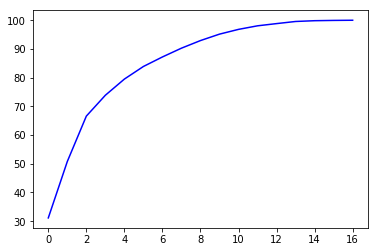

In [20]:
plt.plot(cumvar,color="blue")
plt.show()

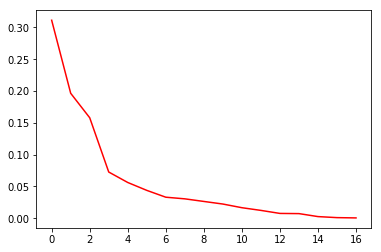

In [21]:
plt.plot(var,color="red")
plt.show()

In [22]:
from sklearn.cluster import KMeans

In [46]:
pccomp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.365057,0.124412,0.395027,-0.411567,0.146461,0.191004,0.031681,-0.295103,-0.251291,-0.216616,0.111658,0.069861,-0.066201,-0.171368,-0.094217,-0.275602,0.365784
1,-0.119176,-0.185534,-0.000023,-0.003314,-0.306744,0.375346,0.252368,0.316769,0.206864,-0.366452,0.001704,0.455776,-0.344366,0.163622,-0.117960,0.090427,-0.009399
2,0.186787,-0.504222,-0.139621,0.114749,-0.311355,0.006890,0.087255,0.108444,-0.390807,-0.132630,0.176961,-0.049992,0.309452,-0.408083,-0.042356,0.006230,0.305920
3,0.058717,-0.161842,0.007388,-0.021119,0.046640,-0.079891,-0.587435,0.171909,0.009407,-0.153220,0.061197,0.216989,-0.179227,-0.020915,0.629475,-0.283337,0.056540
4,0.008278,0.024145,-0.084897,-0.062424,0.072533,-0.050845,0.223832,0.090026,0.113792,0.099678,0.907997,-0.125547,-0.069178,0.169192,0.088526,-0.124610,-0.048082


In [48]:
new_d = (pcs.components_)

In [49]:
new_df=pccomp.iloc[:,:5]

m1 = KMeans(n_clusters = 3)
m1.fit(new_df)
m1.labels_
new_df.shape
#new_df.head()

(17, 5)

In [50]:
new_df.to_matrix()

AttributeError: 'DataFrame' object has no attribute 'to_matrix'

In [51]:
new_df.to_numpy()

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

In [52]:
import scipy.cluster.hierarchy as shc


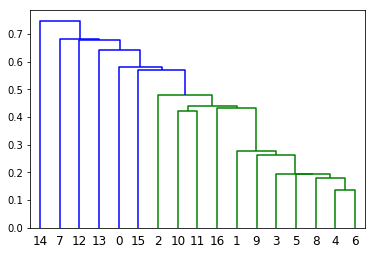

In [53]:
dend= shc.dendrogram(shc.linkage(new_df))

In [54]:
from sklearn.cluster import AgglomerativeClustering as a
cluster=a(n_clusters=3,affinity='euclidean',linkage='ward')
Y=cluster.fit_predict(new_df)

In [55]:
new_df

,0,1,2,3,4
0,-0.365057,0.124412,0.395027,-0.411567,0.146461
1,-0.119176,-0.185534,-0.000023,-0.003314,-0.306744
2,0.186787,-0.504222,-0.139621,0.114749,-0.311355
3,0.058717,-0.161842,0.007388,-0.021119,0.046640
4,0.008278,0.024145,-0.084897,-0.062424,0.072533
5,-0.061479,0.192631,0.055663,-0.017117,-0.099125
6,0.061743,0.029352,0.031117,-0.017232,0.082114
7,0.326745,0.013446,-0.123568,0.191187,0.652884
8,-0.027172,0.057976,-0.013041,0.076077,-0.031010
9,-0.163105,0.049876,0.125445,-0.062862,-0.275848


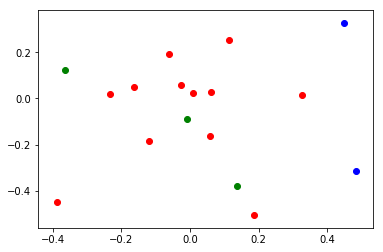

In [58]:
from matplotlib import pyplot as plt
plt.scatter(new_d[Y==0,0],new_d[Y==0,1],c='r',cmap='prism')
plt.scatter(new_d[Y==1,0],new_d[Y==1,1],c='b',cmap='prism')
plt.scatter(new_d[Y==2,0],new_d[Y==2,1],c='g',cmap='prism')
plt.show()